In [1]:
# Import the standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing our training and test dataset as dataframes
train=pd.read_csv('C:\\Users\\Aayush Kandpal\\Downloads\\train.csv')
test=pd.read_csv('C:\\Users\\Aayush Kandpal\\Downloads\\test.csv')

In [3]:
train=train.fillna(train.mean())
test=test.fillna(test.mean())

In [4]:
x=train.drop('Crop_Damage',axis=1)
x=x.drop('ID',axis=1)
y=train.iloc[:,-1]


In [5]:
train.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [6]:
xv=train.drop(['ID',  'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Season'],axis=1)

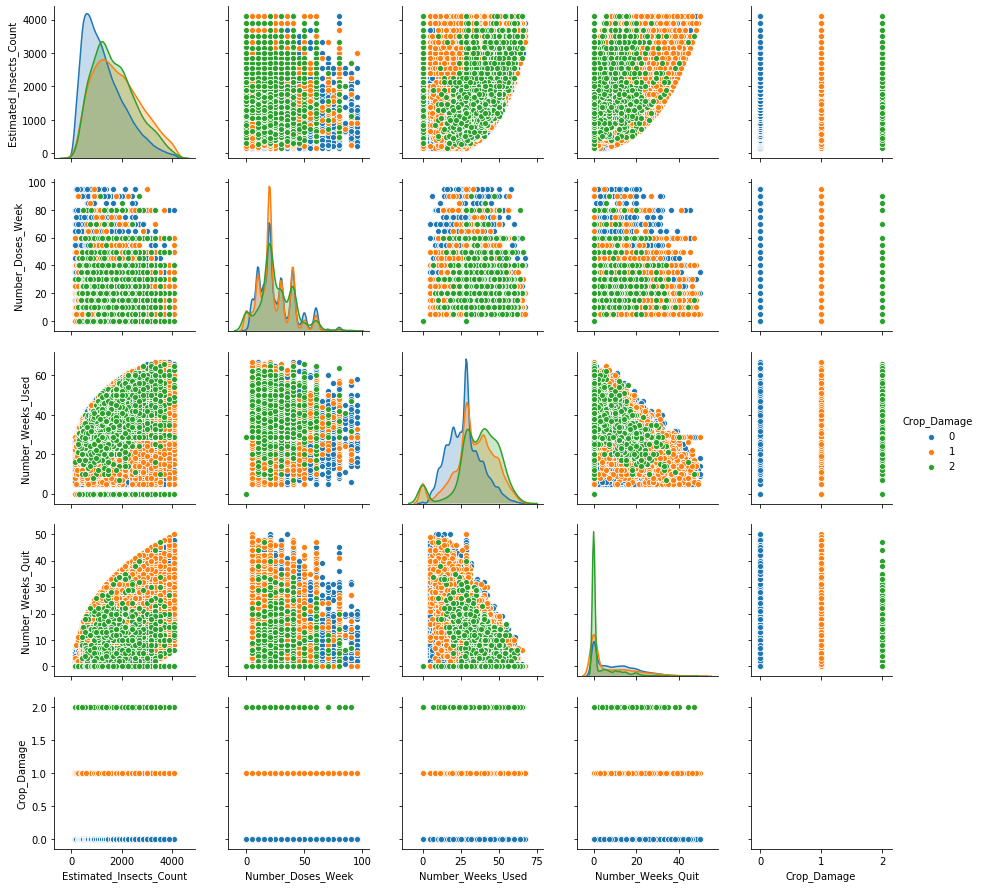

In [23]:
sns.pairplot(xv,hue='Crop_Damage')

In [9]:
# calculate summary statistics
t1=train.drop(['ID','Crop_Damage'],axis=1)
data_mean, data_std = np.mean(t1), np.std(t1)
# identify outliers


In [10]:
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off



In [11]:
lower

Estimated_Insects_Count   -1148.119799
Crop_Type                    -1.068974
Soil_Type                    -1.036387
Pesticide_Use_Category        0.878879
Number_Doses_Week           -20.813069
Number_Weeks_Used            -6.618532
Number_Weeks_Quit           -20.111740
Season                       -0.206995
dtype: float64

In [47]:
upper

Estimated_Insects_Count    3946.144220
Crop_Type                     1.637724
Soil_Type                     1.953220
Pesticide_Use_Category        3.649493
Number_Doses_Week            72.512972
Number_Weeks_Used            63.866472
Number_Weeks_Quit            39.291712
Season                        4.000914
dtype: float64

In [48]:
# Modelling to a normal distribution 99.7 percent ouf the data should lie between the upper and lower bounds. 
#  Anything outside should be considered as an outlier. However , our data is not perfectly normally distributed hence
  # We need to look for a better approach
    # We can also use 4 standard devaition which will cover 99.994 % of the datset. The standard is 3

In [53]:
t1.skew(axis=0,skipna=True)

Estimated_Insects_Count    0.839146
Crop_Type                  0.955978
Soil_Type                  0.166914
Pesticide_Use_Category     0.779488
Number_Doses_Week          0.962879
Number_Weeks_Used          0.258007
Number_Weeks_Quit          0.892773
Season                     0.145228
dtype: float64

In [18]:
# It can be seen that some of our data is higly skewed.
t1_log=np.log(t1)

In [19]:
t1_log.skew(axis=0,skipna=True)
# Some columns couldnt be transformed as we have 0 in those columns

Estimated_Insects_Count   -0.486534
Crop_Type                       NaN
Soil_Type                       NaN
Pesticide_Use_Category     0.246654
Number_Doses_Week               NaN
Number_Weeks_Used               NaN
Number_Weeks_Quit               NaN
Season                    -0.351633
dtype: float64

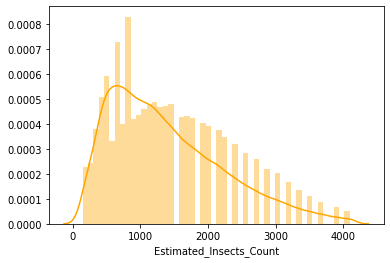

In [58]:
sns.distplot(t1.Estimated_Insects_Count,color='orange')

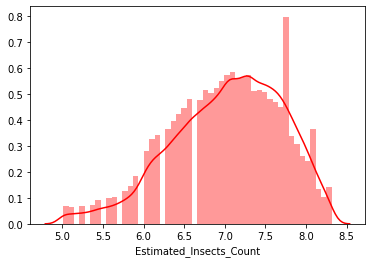

In [54]:
sns.distplot(t1_log.Estimated_Insects_Count,color='red',label='After')

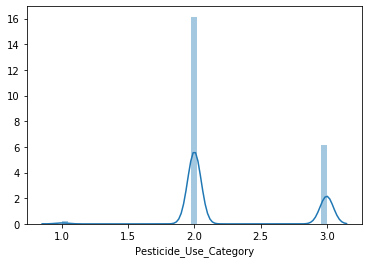

In [49]:
sns.distplot(t1.Pesticide_Use_Category)


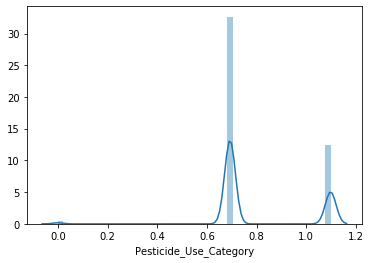

In [59]:
sns.distplot(t1_log.Pesticide_Use_Category)